In [15]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Function to evaluate the credibility of a URL
def evaluate_credibility(url):
    credibility_score = 0.0
    explanation = "No valid evaluation."

    try:
        # Fetch the webpage content
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check for trusted domains
            if any(ext in url for ext in [".gov", ".edu", ".org"]):
                credibility_score += 0.3
                explanation = "Trusted domain detected."

            # Check for citation references
            references = len(soup.find_all("a", href=True))
            if references > 10:
                credibility_score += 0.3
                explanation += " Multiple references found."

            # Check for author details
            author_meta = soup.find("meta", {"name": "author"})
            if author_meta:
                credibility_score += 0.2
                explanation += " Author details available."

            # Normalize score
            credibility_score = round(min(1.0, credibility_score), 2)

        else:
            explanation = "Could not retrieve webpage."

    except Exception as e:
        explanation = f"Error fetching URL: {str(e)}"

    return {"score": credibility_score, "explanation": explanation}


In [17]:
test_url = "https://www.nytimes.com"
result = evaluate_credibility(test_url)
print(json.dumps(result, indent=2))

{
  "score": 0.3,
  "explanation": "No valid evaluation. Multiple references found."
}


In [18]:
# DATASET WITH 12 URLS
data = {
    "URL": [
        "https://www.nytimes.com",
        "https://www.wikipedia.org",
        "https://www.reddit.com",
        "https://www.cnn.com",
        "https://www.bbc.com",
        "https://www.sciencedirect.com",
        "https://www.nih.gov",
        "https://www.medium.com",
        "https://www.researchgate.net",
        "https://www.forbes.com",
        "https://www.nasa.gov",
        "https://www.who.int"
    ],
    "Manual_Score": [0.9, 0.7, 0.4, 0.8, 0.85, 0.95, 1.0, 0.5, 0.9, 0.6, 1.0, 1.0],  # Manually assigned scores
}

df = pd.DataFrame(data)

df["Function_Score"] = df["URL"].apply(lambda x: evaluate_credibility(x)["score"])


df.to_csv("credibility_scores_12_rows.csv", index=False)

# Display the first 12 rows
df

,URL,Manual_Score,Function_Score
0,https://www.nytimes.com,0.90,0.3
1,https://www.wikipedia.org,0.70,0.6
2,https://www.reddit.com,0.40,0.0
3,https://www.cnn.com,0.80,0.5
4,https://www.bbc.com,0.85,0.3
5,https://www.sciencedirect.com,0.95,0.0
6,https://www.nih.gov,1.00,0.6
7,https://www.medium.com,0.50,0.3
8,https://www.researchgate.net,0.90,0.0
9,https://www.forbes.com,0.60,0.3


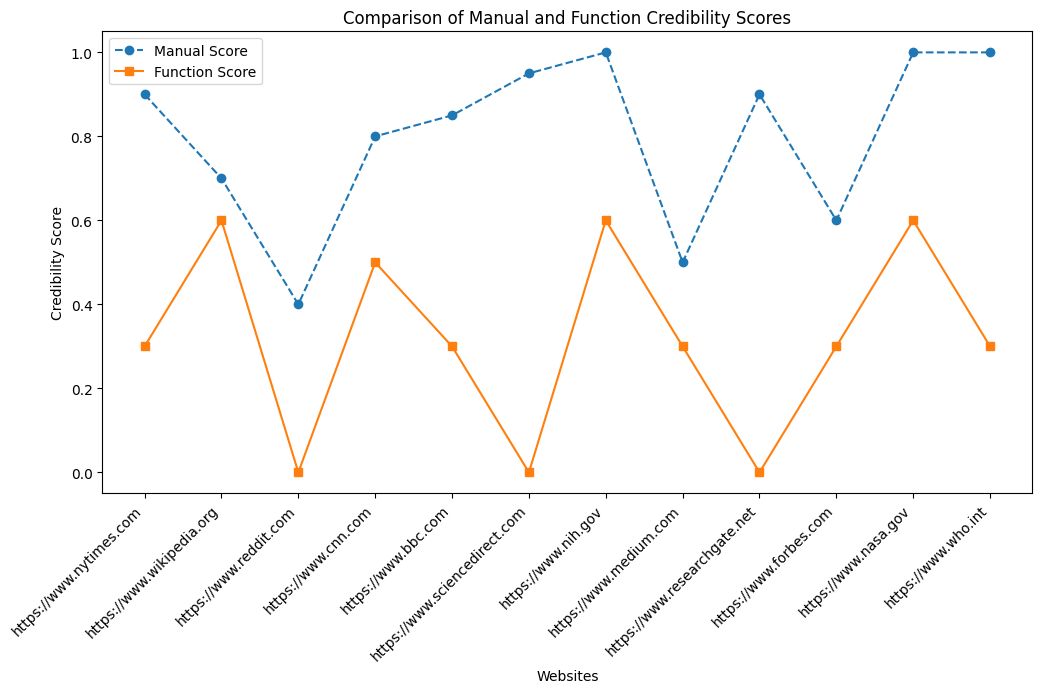

In [19]:
# COMPARISON
plt.figure(figsize=(12, 6))
plt.plot(df["URL"], df["Manual_Score"], marker="o", label="Manual Score", linestyle="dashed")
plt.plot(df["URL"], df["Function_Score"], marker="s", label="Function Score", linestyle="solid")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Websites")
plt.ylabel("Credibility Score")
plt.title("Comparison of Manual and Function Credibility Scores")
plt.legend()
plt.show()

In [20]:
# Dataset with user prompts and URLs
data = {
    "User Prompt": [
        "What are the latest updates on global politics?",
        "Can Wikipedia be trusted for academic research?",
        "What are the most trending topics in technology today?",
        "What is the impact of artificial intelligence on jobs?",
        "How does climate change affect global weather patterns?",
        "What are the latest scientific breakthroughs in medicine?",
        "What are the official symptoms of COVID-19?",
        "How can I improve my writing skills for blogging?",
        "What are the benefits of publishing research on ResearchGate?",
        "What are the key financial trends to watch for this year?",
        "What is NASA's latest mission in space exploration?",
        "Are vaccines safe for children according to WHO?"
    ],
    "URL": [
        "https://www.nytimes.com",
        "https://www.wikipedia.org",
        "https://www.reddit.com",
        "https://www.cnn.com",
        "https://www.bbc.com",
        "https://www.sciencedirect.com",
        "https://www.nih.gov",
        "https://www.medium.com",
        "https://www.researchgate.net",
        "https://www.forbes.com",
        "https://www.nasa.gov",
        "https://www.who.int"
    ]
}

df = pd.DataFrame(data)

df["Function_Score"] = df["URL"].apply(lambda x: evaluate_credibility(x)["score"])

df.to_csv("credibility_scores_with_prompts.csv", index=False)

# Display the DataFrame
print(df)

                                          User Prompt  \
0     What are the latest updates on global politics?   
1     Can Wikipedia be trusted for academic research?   
2   What are the most trending topics in technolog...   
3   What is the impact of artificial intelligence ...   
4   How does climate change affect global weather ...   
5   What are the latest scientific breakthroughs i...   
6         What are the official symptoms of COVID-19?   
7   How can I improve my writing skills for blogging?   
8   What are the benefits of publishing research o...   
9   What are the key financial trends to watch for...   
10  What is NASA's latest mission in space explora...   
11   Are vaccines safe for children according to WHO?   

                              URL  Function_Score  
0         https://www.nytimes.com             0.3  
1       https://www.wikipedia.org             0.6  
2          https://www.reddit.com             0.0  
3             https://www.cnn.com             0.5 